In [2]:
import subprocess
import os
import time
import numpy as np
import open3d as o3d
import re

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## set dataset and GoF

In [3]:
dataset = 'Dancer'
GoF = 5

In [3]:
input_dir = os.path.join(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data', os.path.join(dataset, 'meshes'))

output_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)
print(input_dir)
print(output_root_dir)

G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data\Dancer\meshes
G:\PycharmProjects\Mesh_Editing\Results\encode_Draco\Dancer


## Encode

In [4]:
input_dir = os.path.join(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data', os.path.join(dataset, 'meshes'))
output_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)

obj_files = [f for f in os.listdir(input_dir) if f.endswith('.obj')]

qps = range(15,21) # qp from 0 to 14, small qp (qp <=3 or 4) is meaningless

for qp in qps:
    output_dir = os.path.join(output_root_dir, f'{dataset}_qp_{qp}')
    os.makedirs(output_dir, exist_ok=True)

    output_file = os.path.join(output_dir, f'encoding_times_qp_{qp}.txt')
    with open(output_file, 'w') as f:
        total_encoding_time = 0
        for obj_file in obj_files:

            input_path = os.path.join(input_dir, obj_file)
            output_path = os.path.join(output_dir, obj_file.replace('.obj', f'_qp_{qp}.drc'))

            start_time = time.time()

            result = subprocess.run([
                            r'G:\Github\draco\build\Debug\draco_encoder',
                            '-i', input_path,
                            '-o', output_path,
                            '-qp', str(qp)
                            ], capture_output=True, text=True)
            print(result.stdout)
            end_time = time.time()

            encoding_time = end_time - start_time
            total_encoding_time += encoding_time
            print(f"Encoded {obj_file} in {encoding_time:.4f} seconds")
            f.write(f"Encoded {obj_file} in {encoding_time:.4f} seconds\n")

        total_files = len(obj_files)
        average_encoding_time = total_encoding_time / total_files

        f.write(f"\nTotal encoding time for qp {qp}: {total_encoding_time:.4f} seconds\n")
        f.write(f"Average encoding time for qp {qp}: {average_encoding_time:.4f} seconds\n\n")

Encoder options:
  Compression level = 7
  Positions: Quantization = 15 bits

Encoded mesh saved to G:\PycharmProjects\Mesh_Editing\Results\encode_Draco\Dancer\Dancer_qp_15\dancer_fr0005_qp_15.drc (186 ms to encode).

Encoded size = 54867 bytes

For better compression, increase the compression level up to '-cl 10' .


Encoded dancer_fr0005.obj in 0.3333 seconds
Encoder options:
  Compression level = 7
  Positions: Quantization = 15 bits

Encoded mesh saved to G:\PycharmProjects\Mesh_Editing\Results\encode_Draco\Dancer\Dancer_qp_15\dancer_fr0006_qp_15.drc (189 ms to encode).

Encoded size = 54500 bytes

For better compression, increase the compression level up to '-cl 10' .


Encoded dancer_fr0006.obj in 0.3144 seconds
Encoder options:
  Compression level = 7
  Positions: Quantization = 15 bits

Encoded mesh saved to G:\PycharmProjects\Mesh_Editing\Results\encode_Draco\Dancer\Dancer_qp_15\dancer_fr0007_qp_15.drc (184 ms to encode).

Encoded size = 54730 bytes

For better compression, in

## Decode

In [5]:
input_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)
output_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\decode_Draco', dataset)
print(input_root_dir)
print(output_root_dir)

G:\PycharmProjects\Mesh_Editing\Results\encode_Draco\Dancer
G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer


In [4]:
input_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)
output_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\decode_Draco', dataset)
os.makedirs(output_root_dir, exist_ok=True)


qps = range(9,10)

for qp in qps:
    output_dir = os.path.join(output_root_dir, f'{dataset}_qp_{qp}')
    os.makedirs(output_dir, exist_ok=True)
    input_dir = os.path.join(input_root_dir, f'{dataset}_qp_{qp}')
    drc_files = [f for f in os.listdir(input_dir) if f.endswith('.drc')]
    output_file = os.path.join(output_dir, f'decoding_times_qp_{qp}.txt')
    with open(output_file, 'w') as f:
        total_decoding_time = 0
        for drc_file in drc_files:
            input_path = os.path.join(input_dir, drc_file)
            output_path = os.path.join(output_dir, drc_file.replace(f'_qp_{qp}.drc', f'_qp_{qp}_decoded.obj'))
            start_time = time.time()

            # Use subprocess to execute the draco_decoder command
            result = subprocess.run([
                                    r'G:\Github\draco\build\Debug\draco_decoder', 
                                    '-i', input_path,
                                    '-o', output_path
                                    ], capture_output=True, text=True)
            print(result.stdout)
            end_time = time.time()

            decoding_time = end_time - start_time
            total_decoding_time += decoding_time
            print(f"Decoded {drc_file} in {decoding_time:.4f} seconds")
            f.write(f"Decoded {drc_file} in {decoding_time:.4f} seconds\n")
        total_files = len(drc_files)
        average_decoding_time = total_decoding_time / total_files

        f.write(f"\nTotal decoding time for qp {qp}: {total_decoding_time:.4f} seconds\n")
        f.write(f"Average decoding time for qp {qp}: {average_decoding_time:.4f} seconds\n\n")

Decoded geometry saved to G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer\Dancer_qp_9\dancer_fr0005_qp_9_decoded.obj (47 ms to decode)

Decoded dancer_fr0005_qp_9.drc in 0.2457 seconds
Decoded geometry saved to G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer\Dancer_qp_9\dancer_fr0006_qp_9_decoded.obj (46 ms to decode)

Decoded dancer_fr0006_qp_9.drc in 0.2231 seconds
Decoded geometry saved to G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer\Dancer_qp_9\dancer_fr0007_qp_9_decoded.obj (47 ms to decode)

Decoded dancer_fr0007_qp_9.drc in 0.2458 seconds
Decoded geometry saved to G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer\Dancer_qp_9\dancer_fr0008_qp_9_decoded.obj (46 ms to decode)

Decoded dancer_fr0008_qp_9.drc in 0.2160 seconds
Decoded geometry saved to G:\PycharmProjects\Mesh_Editing\Results\decode_Draco\Dancer\Dancer_qp_9\dancer_fr0009_qp_9_decoded.obj (58 ms to decode)

Decoded dancer_fr0009_qp_9.drc in 0.2508 seconds
Decoded geometr

## Calculate Bitrate

In [7]:
frame_rate = 30 # the requirement for real-time (30 fps in both encoder/decoder) performance
number_frames = 5

In [13]:
import os

def calculate_bitrate(file_size, duration):
    return file_size * 8 / duration

input_root_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\encode_Draco', dataset)

qps = range(6,21) # qp < 6 is useless
for qp in qps:
    total_size = 0
    input_dir = os.path.join(input_root_dir, f'{dataset}_qp_{qp}')
    drc_files = [f for f in os.listdir(input_dir) if f.endswith('.drc')]
    
    for i in range(number_frames):
        file_path = os.path.join(input_dir, drc_files[i])
        file_size = os.path.getsize(file_path)
        total_size += file_size

    total_duration = number_frames / frame_rate
    overall_bitrate = calculate_bitrate(total_size, total_duration)
    
    print(f"Total Size of {number_frames} DRC Files: {total_size} bytes")
    print(f"Overall Bitrate: {overall_bitrate} bits per second")

    bitrate_kbps = overall_bitrate / 1000
    bitrate_mbps = overall_bitrate / 1000000
    

    print(f"Overall Bitrate: {bitrate_kbps:.2f} Kbps")
    print(f"Overall Bitrate: {bitrate_mbps:.2f} Mbps")
    
    output_file = os.path.join(input_dir, f'{dataset}_qp_{qp}_GoF_{number_frames}_bitrate_info.txt')
    with open(output_file, 'w') as file:
        file.write(f"Total Size of {number_frames} DRC Files: {total_size} bytes\n")
        file.write(f"Overall Bitrate: {overall_bitrate} bits per second\n")
        file.write(f"Overall Bitrate: {bitrate_kbps:.2f} Kbps\n")
        file.write(f"Overall Bitrate: {bitrate_mbps:.2f} Mbps\n")
    
    print("Bitrate information has been saved to 'bitrate_info.txt'")

Total Size of 5 DRC Files: 68966 bytes
Overall Bitrate: 3310368.0 bits per second
Overall Bitrate: 3310.37 Kbps
Overall Bitrate: 3.31 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 5 DRC Files: 83276 bytes
Overall Bitrate: 3997248.0 bits per second
Overall Bitrate: 3997.25 Kbps
Overall Bitrate: 4.00 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 5 DRC Files: 101537 bytes
Overall Bitrate: 4873776.0 bits per second
Overall Bitrate: 4873.78 Kbps
Overall Bitrate: 4.87 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 5 DRC Files: 127846 bytes
Overall Bitrate: 6136608.0 bits per second
Overall Bitrate: 6136.61 Kbps
Overall Bitrate: 6.14 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 5 DRC Files: 160987 bytes
Overall Bitrate: 7727376.0 bits per second
Overall Bitrate: 7727.38 Kbps
Overall Bitrate: 7.73 Mbps
Bitrate information has been saved to 'bitrate_info.txt'
Total Size of 5 D

## Get error

In [19]:
def compute_D1_psnr(original_mesh, decoded_mesh):
    
    original_vertices = np.array(original_mesh.vertices)
    #original_vertices = normalize_vertices(original_vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    #decoded_vertices = normalize_vertices(decoded_vertices)
    
    pcd_original = o3d.geometry.PointCloud()
    pcd_original.points = o3d.utility.Vector3dVector(original_vertices)
    
    pcd_decoded = o3d.geometry.PointCloud()
    pcd_decoded.points = o3d.utility.Vector3dVector(decoded_vertices)
    pcd_tree = o3d.geometry.KDTreeFlann(pcd_decoded)
    
    MSE = 0
    for i in range(0, len(original_vertices)):
        [k, index, _] = pcd_tree.search_knn_vector_3d(original_vertices[i], 1)
        #MSE += np.square(original_vertices[i] - decoded_vertices[index])
        MSE += np.square(np.linalg.norm(original_vertices[i] - decoded_vertices[index]))
    MSE = MSE / len(original_vertices)
    
    aabb = pcd_original.get_axis_aligned_bounding_box()
    min_bound = aabb.get_min_bound()

    max_bound = aabb.get_max_bound()

    signal_peak = np.linalg.norm(max_bound - min_bound)
    psnr = 20 * np.log10(signal_peak) - 10 * np.log10(MSE)
    
    return psnr
# keep order of loaded files
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')

In [19]:
original_input_dir = os.path.join(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data', os.path.join(dataset, 'meshes'))
decoded_input_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\decode_Draco', dataset)

files = os.listdir(original_input_dir)
original_obj_files = [file for file in files if file.endswith('.obj')]

original_obj_files.sort(key=extract_number)
    
qps = range(6,21)
result_file_path = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results', f'{dataset}_D1_PSNR_results.txt')
with open(result_file_path, 'w') as result_file:
    for qp in qps:
        d1_psnr_values = []
        decoded_obj_path = os.path.join(decoded_input_dir, f'{dataset}_qp_{qp}')
        files = os.listdir(decoded_obj_path)
        decoded_obj_files = [file for file in files if file.endswith('.obj')]
        for i in range(len(original_obj_files)):
            original_mesh = o3d.io.read_triangle_mesh(os.path.join(original_input_dir, original_obj_files[i]))
            decoded_mesh = o3d.io.read_triangle_mesh(os.path.join(decoded_obj_path, decoded_obj_files[i]))
            d1_psnr = max(compute_D1_psnr(original_mesh, decoded_mesh), compute_D1_psnr(decoded_mesh, original_mesh))
            d1_psnr_values.append(d1_psnr)
            
        avg_psnr_5 = np.mean(d1_psnr_values[:5])
        avg_psnr_10 = np.mean(d1_psnr_values[:10])
        avg_psnr_15 = np.mean(d1_psnr_values[:15])
        avg_psnr = np.mean(d1_psnr_values)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average D1 PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average D1 PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average D1 PSNR: {avg_psnr_15}\n")
        
        print(f"qp={qp}, Number of frames: {len(original_obj_files)}, Average D1 PSNR: {avg_psnr}\n")

qp=6, Number of frames: 15, Average D1 PSNR: 45.15594179930272

qp=7, Number of frames: 15, Average D1 PSNR: 50.40527191540365

qp=8, Number of frames: 15, Average D1 PSNR: 56.0042318096143

qp=9, Number of frames: 15, Average D1 PSNR: 61.76375919208772

qp=10, Number of frames: 15, Average D1 PSNR: 67.76367148414825

qp=11, Number of frames: 15, Average D1 PSNR: 73.79531677529627

qp=12, Number of frames: 15, Average D1 PSNR: 79.78601710414394

qp=13, Number of frames: 15, Average D1 PSNR: 85.81065438745249

qp=14, Number of frames: 15, Average D1 PSNR: 91.81955891832497

qp=15, Number of frames: 15, Average D1 PSNR: 97.86682480577659

qp=16, Number of frames: 15, Average D1 PSNR: 103.8736465214976

qp=17, Number of frames: 15, Average D1 PSNR: 109.86547036232598

qp=18, Number of frames: 15, Average D1 PSNR: 115.94633597635234

qp=19, Number of frames: 15, Average D1 PSNR: 121.45345164863609

qp=20, Number of frames: 15, Average D1 PSNR: 125.93721067747578



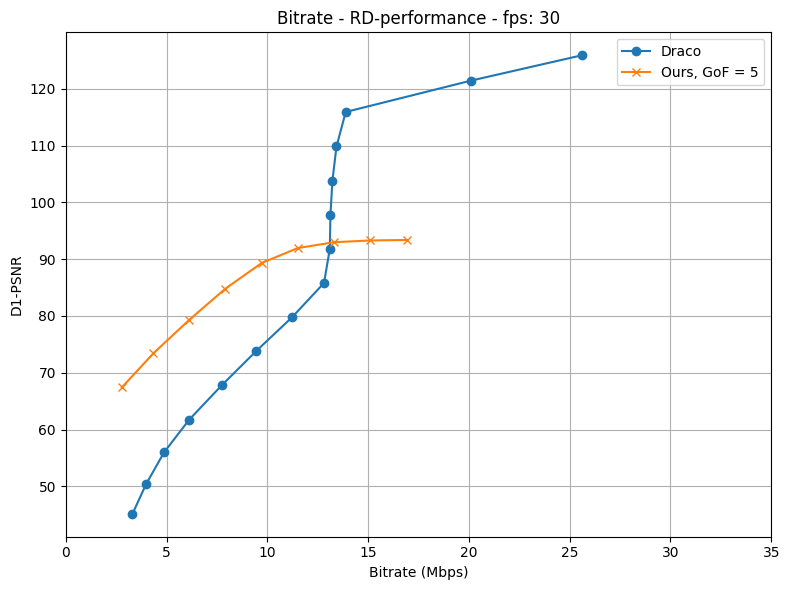

In [2]:
import matplotlib.pyplot as plt


Bitrates = [3.31, 3.99, 4.88, 6.13, 7.73, 9.44, 11.23, 12.81, 13.10, 13.13, 13.23, 13.43, 13.89, 20.08, 25.61]  
D1_PSNR = [45.15, 50.41, 56.00, 61.76, 67.76, 73.80, 79.79, 85.81, 91.82, 97.87, 103.87, 109.87, 115.95, 121.45, 125.94] 


ours_Bitrates = [2.78, 4.34, 6.12, 7.92, 9.72, 11.51, 13.31, 15.11, 16.91]  
ours_D1_PSNR = [67.41, 73.41, 79.30, 84.82, 89.34, 91.97, 93.00, 93.31, 93.39] 

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Bitrates, D1_PSNR, marker='o', label='Draco')
plt.plot(ours_Bitrates, ours_D1_PSNR, marker='x', label='Ours, GoF = 5')
plt.title('Bitrate - RD-performance - fps: 30')
plt.xlabel('Bitrate (Mbps)')
plt.ylabel('D1-PSNR')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.xlim(0, 35)
plt.tight_layout()

# Display the plot
plt.show()


In [13]:
def compute_D2_psnr(original_mesh, decoded_mesh):
    decoded_mesh.compute_vertex_normals()
    
    original_vertices = np.array(original_mesh.vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    
    pcd_original = o3d.geometry.PointCloud()
    pcd_original.points = o3d.utility.Vector3dVector(original_vertices)
    
    
    pcd_decoded = o3d.geometry.PointCloud()
    pcd_decoded.points = o3d.utility.Vector3dVector(decoded_vertices)
    pcd_decoded.normals = o3d.utility.Vector3dVector(decoded_mesh.vertex_normals)
    pcd_tree = o3d.geometry.KDTreeFlann(pcd_decoded)
    
    MSE = 0
    for i in range(0, len(original_vertices)):
        [k, index, _] = pcd_tree.search_knn_vector_3d(original_vertices[i], 1)
        MSE += np.square(np.dot((original_vertices[i] - decoded_vertices[index])[0], np.array(pcd_decoded.normals)[index][0]))
    MSE = MSE / len(original_vertices)
    
    aabb = pcd_original.get_axis_aligned_bounding_box()
    min_bound = aabb.get_min_bound()

    max_bound = aabb.get_max_bound()

    signal_peak = np.linalg.norm(max_bound - min_bound)
    psnr = 20 * np.log10(signal_peak) - 10 * np.log10(MSE)
    
    return psnr

def compute_MSE_RMSE(original_mesh, decoded_mesh):
    
    original_vertices = np.array(original_mesh.vertices)
    #original_vertices = normalize_vertices(original_vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    #decoded_vertices = normalize_vertices(decoded_vertices)
    
    pcd_original = o3d.geometry.PointCloud()
    pcd_original.points = o3d.utility.Vector3dVector(original_vertices)
    
    pcd_decoded = o3d.geometry.PointCloud()
    pcd_decoded.points = o3d.utility.Vector3dVector(decoded_vertices)
    pcd_tree = o3d.geometry.KDTreeFlann(pcd_decoded)
    
    MSE = 0
    for i in range(0, len(original_vertices)):
        [k, index, _] = pcd_tree.search_knn_vector_3d(original_vertices[i], 1)
        MSE += np.square(np.linalg.norm(original_vertices[i] - decoded_vertices[index]))
    MSE = MSE / len(original_vertices)
    #print("MSE:", MSE)
    RMSE =np.sqrt(MSE)
    
    return np.log10(MSE), np.log10(RMSE)

from scipy.spatial.distance import directed_hausdorff
def compute_Hausdorff(original_mesh, decoded_mesh):
    original_vertices = np.array(original_mesh.vertices)
    decoded_vertices = np.array(decoded_mesh.vertices)
    hausdorff = directed_hausdorff(original_vertices, decoded_vertices)
    return hausdorff[0] * 1e4


In [20]:
original_input_dir = os.path.join(r'G:\VS2022Projects\tvm-editing-master\TVMEditor.Test\bin\Release\net5.0\Data', os.path.join(dataset, 'meshes'))
decoded_input_dir = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results\decode_Draco', dataset)

files = os.listdir(original_input_dir)
original_obj_files = [file for file in files if file.endswith('.obj')]

original_obj_files.sort(key=extract_number)
    
qps = range(6,21)
result_file_path = os.path.join(r'G:\PycharmProjects\Mesh_Editing\Results', f'{dataset}_results.txt')
with open(result_file_path, 'w') as result_file:
    for qp in qps:
        d2_psnr_values = []
        d1_psnr_values = []
        mses = []
        rmses = []
        hausdorffs = []
        decoded_obj_path = os.path.join(decoded_input_dir, f'{dataset}_qp_{qp}')
        files = os.listdir(decoded_obj_path)
        decoded_obj_files = [file for file in files if file.endswith('.obj')]
        for i in range(len(original_obj_files)):
            original_mesh = o3d.io.read_triangle_mesh(os.path.join(original_input_dir, original_obj_files[i]))
            decoded_mesh = o3d.io.read_triangle_mesh(os.path.join(decoded_obj_path, decoded_obj_files[i]))
            d2_psnr = max(compute_D2_psnr(original_mesh, decoded_mesh), compute_D2_psnr(decoded_mesh, original_mesh))
            d2_psnr_values.append(d2_psnr)
            d1_psnr = max(compute_D1_psnr(original_mesh, decoded_mesh), compute_D1_psnr(decoded_mesh, original_mesh))
            print("D1:", d1_psnr)
            d1_psnr_values.append(d1_psnr)

        
            logmse1, logrmse1 = compute_MSE_RMSE(original_mesh, decoded_mesh)
            logmse2, logrmse2 = compute_MSE_RMSE(decoded_mesh, original_mesh)
            logmse = min(logmse1, logmse2)
            logrmse = min(logrmse1, logrmse2)
            print("log10 of mse:", logmse, ", log10 of rmse:", logrmse)
            mses.append(logmse)
            rmses.append(logrmse)
            
            
        avg_psnr_5 = np.mean(d2_psnr_values[:5])
        avg_psnr_10 = np.mean(d2_psnr_values[:10])
        avg_psnr_15 = np.mean(d2_psnr_values[:15])
        avg_psnr = np.mean(d2_psnr_values)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average D2 PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average D2 PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average D2 PSNR: {avg_psnr_15}\n")
        
        avg_psnr_5 = np.mean(d1_psnr_values[:5])
        avg_psnr_10 = np.mean(d1_psnr_values[:10])
        avg_psnr_15 = np.mean(d1_psnr_values[:15])
        avg_psnr = np.mean(d1_psnr_values)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average D1 PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average D1 PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average D1 PSNR: {avg_psnr_15}\n")
        
        avg_psnr_5 = np.mean(mses[:5])
        avg_psnr_10 = np.mean(mses[:10])
        avg_psnr_15 = np.mean(mses[:15])
        avg_psnr = np.mean(mses)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average log of mse PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average log of mse PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average log of mse PSNR: {avg_psnr_15}\n")
        
        avg_psnr_5 = np.mean(rmses[:5])
        avg_psnr_10 = np.mean(rmses[:10])
        avg_psnr_15 = np.mean(rmses[:15])
        avg_psnr = np.mean(rmses)

        result_file.write(f"qp={qp}, Number of frames: {5}, Average log of rmse PSNR: {avg_psnr_5}\n")
        result_file.write(f"qp={qp}, Number of frames: {10}, Average log of rmse PSNR: {avg_psnr_10}\n")
        result_file.write(f"qp={qp}, Number of frames: {15}, Average log of rmse PSNR: {avg_psnr_15}\n")
        
       
        #print(f"qp={qp}, Number of frames: {len(original_obj_files)}, Average D2 PSNR: {avg_psnr}\n")

D1: 45.085839001771696
log10 of mse: -3.843444636083813 , log10 of rmse: -1.9217223180419067
Hausdorff distance: 243.10214212036178
D1: 45.149224447411186
log10 of mse: -3.8496494383735556 , log10 of rmse: -1.9248247191867778
Hausdorff distance: 241.82717087955513
D1: 45.117875742339066
log10 of mse: -3.8490755943006936 , log10 of rmse: -1.9245377971503468
Hausdorff distance: 243.49562311418097
D1: 45.23474410409569
log10 of mse: -3.8559106857043717 , log10 of rmse: -1.9279553428521858
Hausdorff distance: 240.59795636465122
D1: 45.2275996676519
log10 of mse: -3.8503691815790875 , log10 of rmse: -1.925184590789544
Hausdorff distance: 240.91876554009787
D1: 45.19257979371305
log10 of mse: -3.841350772063394 , log10 of rmse: -1.9206753860316972
Hausdorff distance: 248.03004113582767
D1: 45.17651351245253
log10 of mse: -3.8405671184085004 , log10 of rmse: -1.9202835592042502
Hausdorff distance: 250.66843013779066
D1: 44.94954324389285
log10 of mse: -3.8157275173608975 , log10 of rmse: -1.9

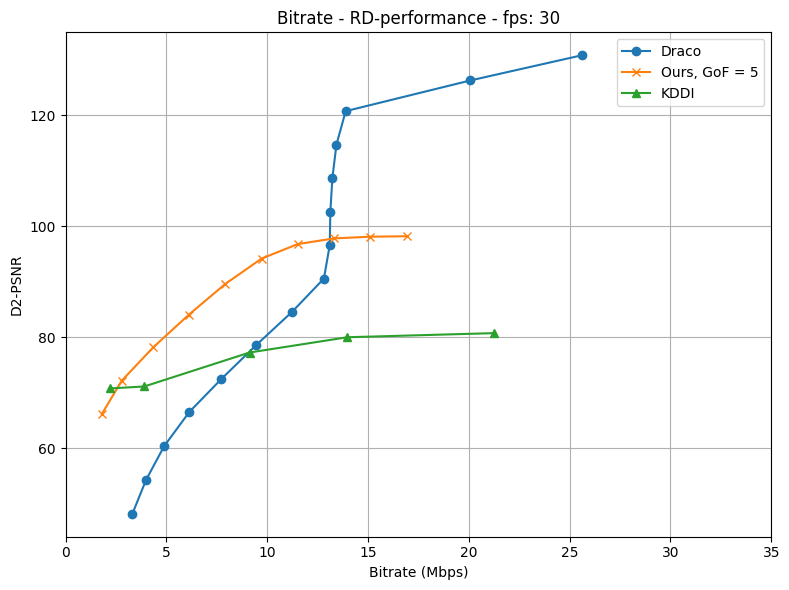

In [12]:
import matplotlib.pyplot as plt


Bitrates = [3.31, 3.99, 4.88, 6.13, 7.73, 9.44, 11.23, 12.81, 13.10, 13.13, 13.23, 13.43, 13.89, 20.08, 25.61]  
D2_PSNR = [48.23, 54.34, 60.37, 66.54, 72.52, 78.56, 84.58, 90.57, 96.58, 102.63, 108.64, 114.65, 120.71, 126.24, 130.77] 


ours_Bitrates = [1.79, 2.78, 4.34, 6.12, 7.92, 9.72, 11.51, 13.31, 15.11, 16.91]    
ours_D2_PSNR = [66.15, 72.18, 78.18, 84.10, 89.61, 94.17, 96.78, 97.80, 98.11, 98.19] 

KDDI_Bitrates = [2.18, 3.90, 9.12, 13.97, 21.25]    
KDDI_D2_PSNR = [70.79, 71.15, 77.26, 80.01, 80.75] 


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Bitrates, D2_PSNR, marker='o', label='Draco')
plt.plot(ours_Bitrates, ours_D2_PSNR, marker='x', label='Ours, GoF = 5')
plt.plot(KDDI_Bitrates, KDDI_D2_PSNR, marker='^', label='KDDI')
plt.title('Bitrate - RD-performance - fps: 30')
plt.xlabel('Bitrate (Mbps)')
plt.ylabel('D2-PSNR')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.xlim(0, 35)
plt.tight_layout()

# Display the plot
plt.show()


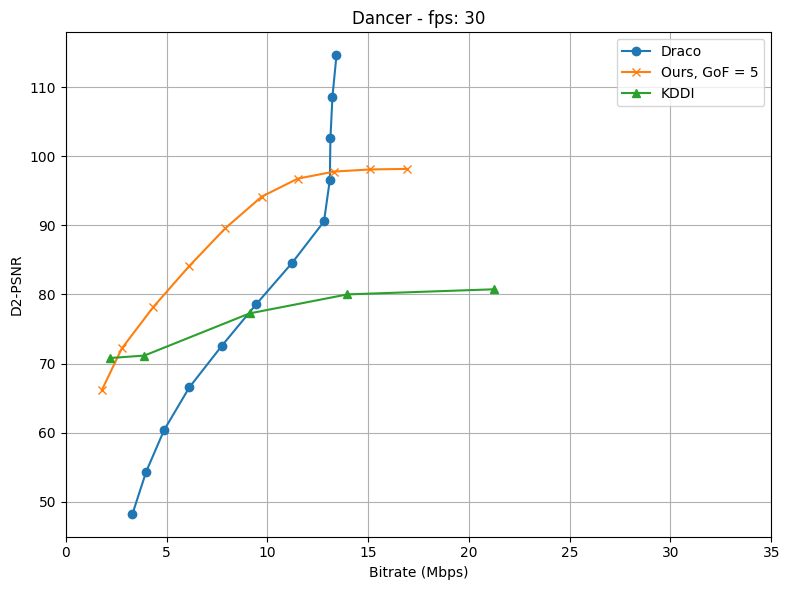

In [11]:
import matplotlib.pyplot as plt


Bitrates = [3.31, 3.99, 4.88, 6.13, 7.73, 9.44, 11.23, 12.81, 13.10, 13.13, 13.23, 13.43]  
D2_PSNR = [48.23, 54.34, 60.37, 66.54, 72.52, 78.56, 84.58, 90.57, 96.58, 102.63, 108.64, 114.65] 


ours_Bitrates = [1.79, 2.78, 4.34, 6.12, 7.92, 9.72, 11.51, 13.31, 15.11, 16.91]    
ours_D2_PSNR = [66.15, 72.18, 78.18, 84.10, 89.61, 94.17, 96.78, 97.80, 98.11, 98.19] 

KDDI_Bitrates = [2.18, 3.90, 9.12, 13.97, 21.25]    
KDDI_D2_PSNR = [70.79, 71.15, 77.26, 80.01, 80.75] 


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Bitrates, D2_PSNR, marker='o', label='Draco')
plt.plot(ours_Bitrates, ours_D2_PSNR, marker='x', label='Ours, GoF = 5')
plt.plot(KDDI_Bitrates, KDDI_D2_PSNR, marker='^', label='KDDI')
plt.title('Dancer - fps: 30')
plt.xlabel('Bitrate (Mbps)')
plt.ylabel('D2-PSNR')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.xlim(0, 35)
plt.tight_layout()

# Display the plot
plt.show()
